In [96]:
import pandas as pd  
import numpy as np
import ydata_profiling
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, \
                    cross_val_score
import os

In [97]:
filepath = os.path.abspath(".")
df_train = pd.read_csv(rf'{filepath}\train.csv')
df_test = pd.read_csv(rf'{filepath}\test.csv')

# Méthode 1 : Collecte de plus de données et Ingénierie des Fonctionnalités

In [98]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# l'ensemble de données d'entraînement contient 891 exemples d'entraînement et 12 fonctionnalités,

PassengerID :  pour identifier le passager, fonction numérique (identification du passager/numéro de billet).

Survived : est notre cible, comme nous pouvons le voir est une caractéristique binaire, 1 si survécu et 0 sinon.

Pclass : est la classe du billet (1 = 1er (supérieur), 2 = 2e (milieu), 3 = 3e (inférieur))

Age : est l'âge en années

Sibsp : est le nombre de frères et sœurs / conjoints à bord du Titanic

Parch : est le nombre de parents/enfants à bord du Titanic

Ticket : est le numéro du ticket

Fare :  est le tarif Passager

Cabin :  est le numéro de la cabine

Embarked :  signifie port d'embarquement. C = Cherbourg, Q = Queenstown, S = Southampton

#En décrivant les données, nous pouvons voir que nous avons de nombreuses fonctionnalités manquantes. Nous avons 891 passagers et 714 âges confirmés, 204 numéros de cabine et 889 embarqués.

In [100]:
df_train[df_train["Name"].str.contains('Jack', na=False)] # There is a Jackson but not Jack (Leonardo Di Caprio)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


In [101]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
df_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


#En décrivant les données, nous pouvons voir que nous avons de nombreuses fonctionnalités manquantes dans le dataset de test. Nous avons 418 passagers et 332 âges confirmés, 91 numéros de cabine et 417 tarif de billet.

# Traitement des données manquantes et des doublons

In [103]:
print('\nNull Values in Training \n{}'.format(df_train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(df_test.isnull().sum()))

print('\nDuplicated values in train {}'.format(df_train.duplicated().sum()))
print('Duplicated values in test {}'.format(df_test.duplicated().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


# Remplissage Embarked et Fare


Nous pouvons remplir le tarif avec la valeur moyenne des tarifs, ce n'est pas un problème et remplir l'embarqué avec le port d'embarquement le plus courant.

In [104]:
print('Embarkation per ports \n{}'.format(df_train['Embarked'].value_counts()))

Embarkation per ports 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [105]:
# since the most common port is Southampton the chances are that the missing one is from there
df_train['Embarked'].fillna(value='S', inplace=True)
df_test['Fare'].fillna(value=df_test.Fare.mean(), inplace=True)

print('Embarkation per ports after filling \n{}'.format(df_train['Embarked'].value_counts()))

Embarkation per ports after filling 
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [106]:
print('\nNull Values in Training \n{}'.format(df_train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(df_test.isnull().sum()))


Null Values in Training 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Null Values in Testing 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# Remplissage de Age

Pour remplir l'âge, on peut cocher les titres (Mlle, Mr, Mme, Maître, Dr) et prendre la moyenne d'âge de chacun, puis remplir l'âge en fonction du titre. 

Master est l'un des titres utilisés dans Titanic, il est utilisé pour les garçons et les jeunes hommes, principalement par les anglais.

In [107]:
df_train[df_train["Name"].str.contains('Master', na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


In [108]:
df=df_train[df_train["Name"].str.contains('Master', na=False)]
df[df['Survived']==1].count()

PassengerId    23
Survived       23
Pclass         23
Name           23
Sex            23
Age            21
SibSp          23
Parch          23
Ticket         23
Fare           23
Cabin           7
Embarked       23
dtype: int64

Mean age of Miss. title 21.77
Mean age of Mrs. title 35.64
Mean age of Mr. title 33.12
Mean age of Master. title 4.57


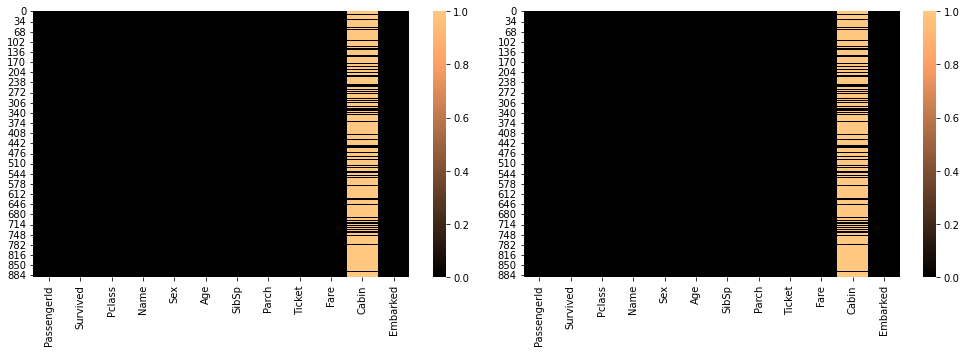

In [109]:
mean_age_miss = round(df_train[df_train["Name"].str.contains('Miss.', na=False)]['Age'].mean(),2)
mean_age_mrs = round(df_train[df_train["Name"].str.contains('Mrs.', na=False)]['Age'].mean(),2)
mean_age_mr = round(df_train[df_train["Name"].str.contains('Mr.', na=False)]['Age'].mean(),2)
mean_age_master = round(df_train[df_train["Name"].str.contains('Master.', na=False)]['Age'].mean(),2)

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

df_train['Age'] = df_train[['Name', 'Age']].apply(fill_age,axis=1)
df_test['Age'] = df_test[['Name', 'Age']].apply(fill_age,axis=1)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(df_train.isnull(),cmap='copper', ax=ax1)
sns.heatmap(df_train.isnull(), cmap='copper', ax=ax2)
plt.tight_layout()

# Presque toutes les données de Cabin sont perdues, 

je pense que nous pourrions faire quelques hypothèses pour trouver un moyen de les remplir, 

par exemple, ne gardons que la première lettre et remplissons les manquantes avec X.

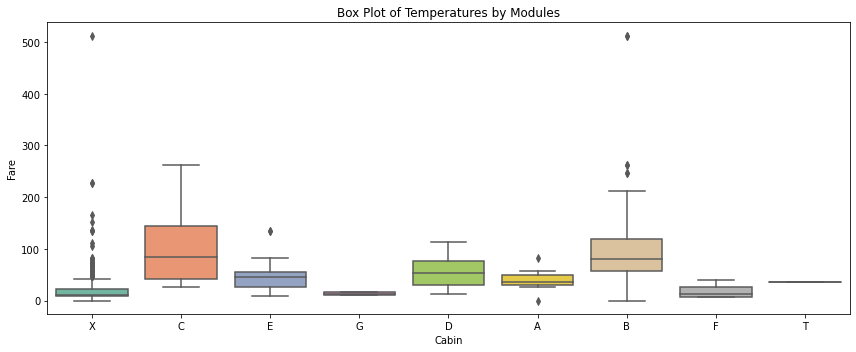

In [110]:
df_train['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in df_train['Cabin']])
df_test['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in df_test['Cabin']])

plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=df_train, palette='Set2')
plt.tight_layout()

In [111]:
df_train['Cabin'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [112]:
df_train['Cabin'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

Nous pouvons voir que la moyenne de la classe X manquante est très faible, 

cela signifie que les personnes sans affectation de cabine avaient, 

dans presque tous les cas, un tarif inférieur, mais il y a des valeurs aberrantes que nous pouvons gérer. 

Nous pourrions prendre ces valeurs aberrantes et les affecter à la classe C ou B car elles ont un tarif plus élevé, faisons cela. 

Je vais faire l'hypothèse que les personnes sans cabine ont payé un tarif bas, 

donc tout le monde avec un tarif relativement élevé dans la classe X est une valeur aberrante, 

donc je les réaffecterai en utilisant la moyenne du reste des classes.

Mean Fare of Cabin B 113.50576382978724
Mean Fare of Cabin C 100.15134067796612
Mean Fare of Cabin D 57.24457575757576
Mean Fare of Cabin E 46.026693749999986


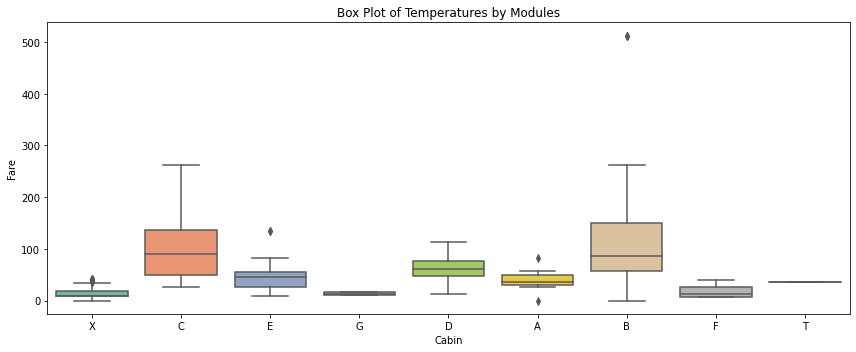

In [113]:
print('Mean Fare of Cabin B {}'.format(df_train[df_train['Cabin']=='B']['Fare'].mean()))
print('Mean Fare of Cabin C {}'.format(df_train[df_train['Cabin']=='C']['Fare'].mean()))
print('Mean Fare of Cabin D {}'.format(df_train[df_train['Cabin']=='D']['Fare'].mean()))
print('Mean Fare of Cabin E {}'.format(df_train[df_train['Cabin']=='E']['Fare'].mean()))

def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'D'
        else:
            return 'X'
    else:
        return cabin
      
df_train['Cabin'] = df_train[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)
df_test['Cabin'] = df_test[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)

plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=df_train, palette='Set2')
plt.tight_layout()

In [114]:
print('\nNull Values in Training \n{}'.format(df_train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(df_test.isnull().sum()))


Null Values in Training 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Null Values in Testing 
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#Maintenant, la cabine X a un tarif bas comme il se doit et il n'y a plus de valeurs manquantes dans notre ensemble de données.

# Feature engineering

L'ingénierie des fonctionnalités consiste à analyser les fonctionnalités et à en extraire des informations utiles, ainsi qu'à créer de nouvelles fonctionnalités à partir de celles existantes. Commençons par faire un peu de visualisation.

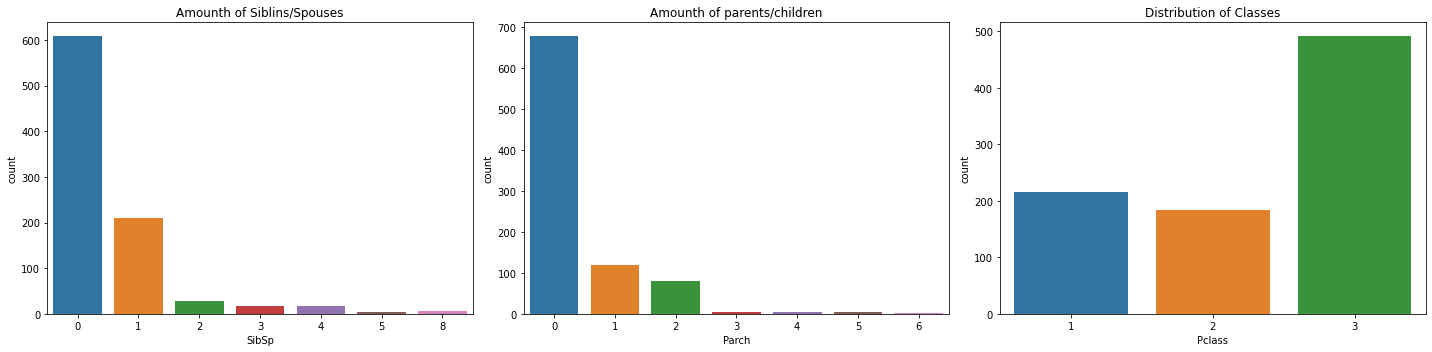

In [115]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Amounth of Siblins/Spouses')
sns.countplot(x='SibSp', data=df_train, ax=axx[0])
axx[1].set_title('Amounth of parents/children')
sns.countplot(x='Parch', data=df_train, ax=axx[1])
axx[2].set_title('Distribution of Classes')
sns.countplot(x='Pclass', data=df_train, ax=axx[2])
plt.tight_layout()

D'après les graphiques, on peut voir que la plupart des gens étaient seuls et la plupart appartenaient à la 3e classe (inférieure). Cela correspond à ce que nous avons vu précédemment avec les cabines et le tarif, la plupart des personnes sans affectation de cabine avaient un petit tarif, c'est logique qu'elles appartiennent à la classe 3. Nous pouvons créer une nouvelle fonctionnalité qui précise si la personne voyageait seule ou en famille basé sur les attributs SibSp (Frères/Époux) et Parch (Parents/Enfants), ainsi que la taille de la famille. Ces attributs pourraient être intéressants. Aussi, traçons les données par rapport à l'étiquette.

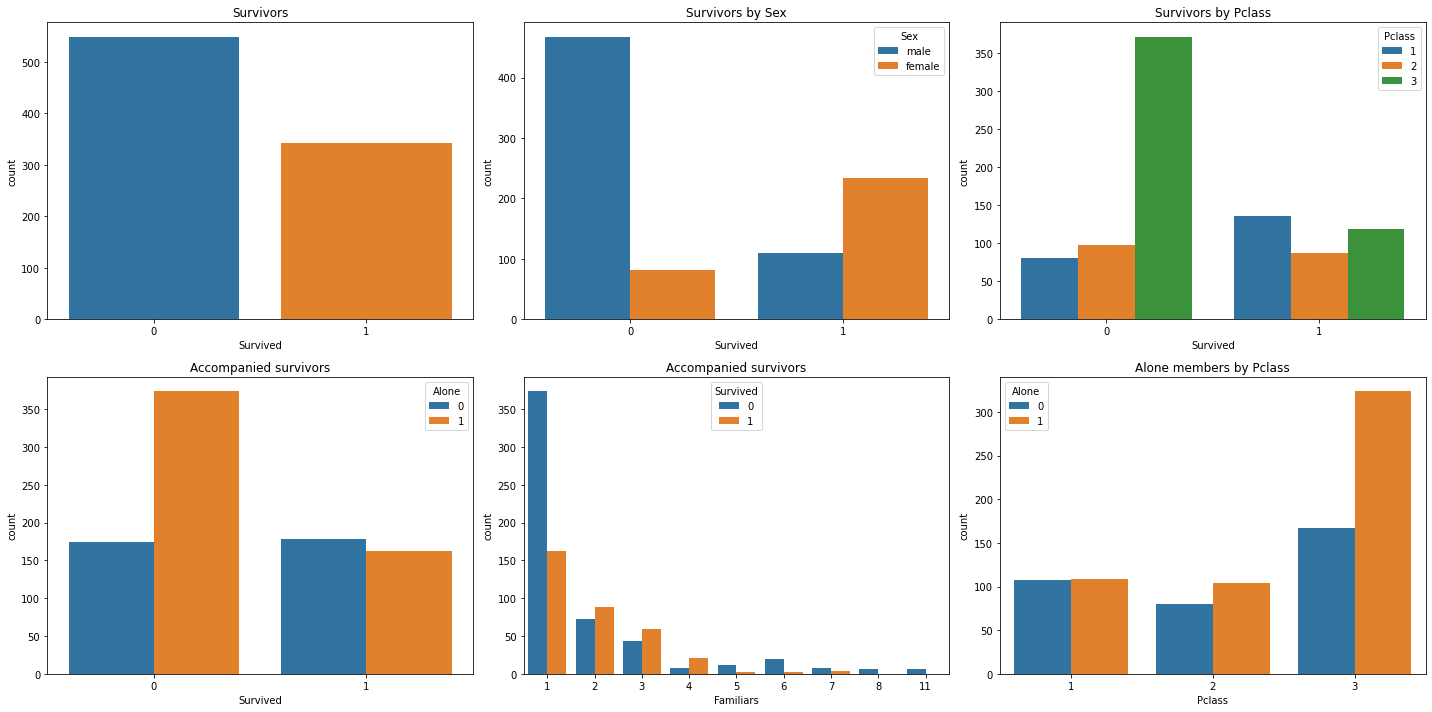

In [116]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0
 
df_train['Alone'] = df_train[['SibSp','Parch']].apply(create_alone_feature, axis=1)
df_train['Familiars'] = 1 + df_train['SibSp'] + df_train['Parch']

df_test['Alone'] = df_test[['SibSp','Parch']].apply(create_alone_feature, axis=1)
df_test['Familiars'] = 1 + df_test['SibSp'] + df_test['Parch']

fig, axx = plt.subplots(2, 3, figsize=(20,10))
axx[0,0].set_title('Survivors')
sns.countplot(x='Survived', data=df_train, ax=axx[0,0])
axx[0,1].set_title('Survivors by Sex')
sns.countplot(x='Survived', hue='Sex', data=df_train, ax=axx[0,1])
axx[0,2].set_title('Survivors by Pclass')
sns.countplot(x='Survived', hue='Pclass', data=df_train, ax=axx[0,2])
axx[1,0].set_title('Accompanied survivors')
sns.countplot(x='Survived', hue='Alone', data=df_train, ax=axx[1,0])
axx[1,1].set_title('Accompanied survivors')
sns.countplot(x='Familiars', hue='Survived', data=df_train, ax=axx[1,1])
axx[1,2].set_title('Alone members by Pclass')
sns.countplot(x='Pclass', hue='Alone', data=df_train, ax=axx[1,2])
plt.tight_layout()

D'après les graphiques, nous pouvons voir que la plupart des gens sont morts dans l'incident. Bien que la plupart des passagers soient des hommes, la plupart des survivants étaient des femmes, bien sûr, les ouvriers du navire et le personnel étaient probablement en majorité des hommes, donc cela a du sens. Nous pouvons voir aussi que la majorité des morts appartenaient à la 3e classe (personnes de classe inférieure), ils ont probablement été évacués en dernier et se trouvaient peut-être dans des parties du navire d'accès plus difficile. La plupart de ceux qui sont morts étaient seuls, cela a du sens car les gens de 3e classe étaient pour la plupart seuls et étaient ceux qui mouraient le plus. Voyons maintenant l'âge et le prix des survivants.

c:\Users\Mo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Mo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


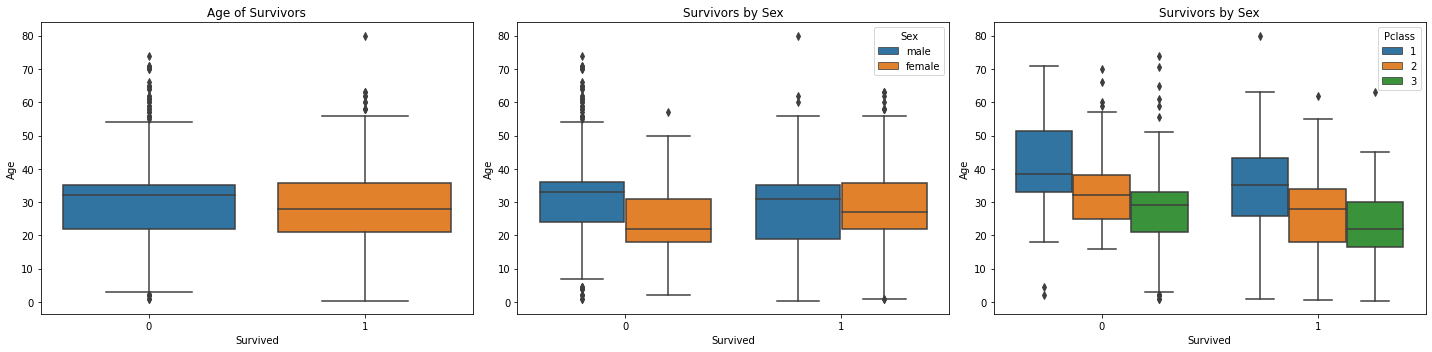

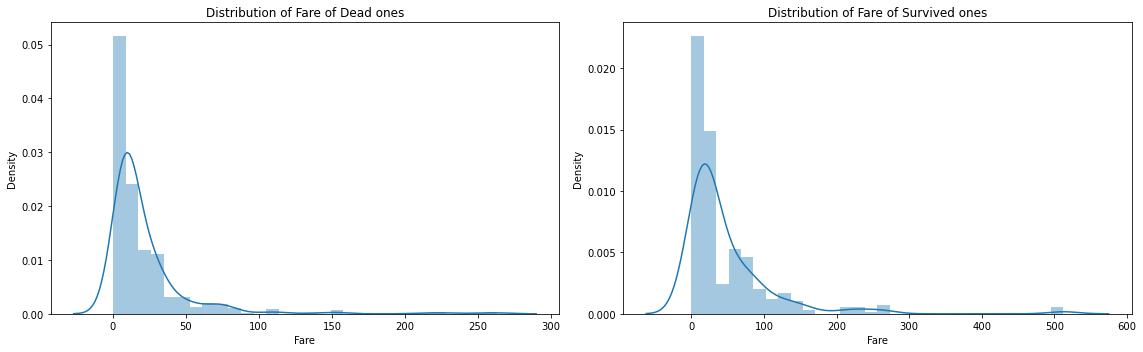

In [117]:
fig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Age of Survivors')
sns.boxplot(x='Survived', y='Age', data=df_train, ax=axx[0])
axx[1].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df_train, ax=axx[1])
axx[2].set_title('Survivors by Sex')
sns.boxplot(x='Survived', y='Age', hue='Pclass', data=df_train, ax=axx[2])
plt.tight_layout()

fig, axx = plt.subplots(1, 2, figsize=(16,5))
axx[0].set_title('Distribution of Fare of Dead ones')
sns.distplot(a=df_train[df_train['Survived']==0]['Fare'], ax=axx[0], bins=30)
axx[1].set_title('Distribution of Fare of Survived ones')
sns.distplot(a=df_train[df_train['Survived']==1]['Fare'], ax=axx[1], bins=30)
plt.tight_layout()

Il est clair que le tarif de ceux qui ont survécu était plus élevé, on peut le voir dans la répartition de chacun. Ceux qui ont survécu étaient un peu plus jeunes que ceux qui sont morts. Nous pouvons également voir que les personnes de 1ère classe étaient plus âgées que les autres et que les personnes de 3ème classe étaient plus jeunes. Ensuite, nous pouvons voir la corrélation entre les fonctionnalités. Fare et Survived ont une certaine corrélation entre eux, mais la corrélation ne prend pas en compte les catégories, il est donc préférable de mapper des fonctionnalités telles que Sex et Embarked sur des nombres.

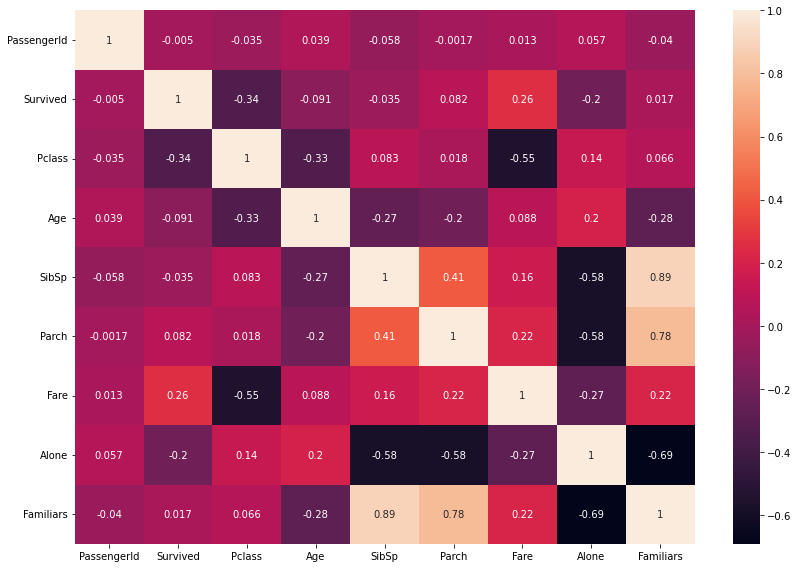

In [118]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), annot=True)
plt.tight_layout()

nous devons donc trouver un moyen de mapper ces catégories en nombres. 

C'est facile à faire dans Pandas en utilisant map()la méthode. 

Je définirai 1 pour les femmes et 0 pour les hommes, pour avoir une corrélation positive puisque la plupart des survies étaient des femmes.

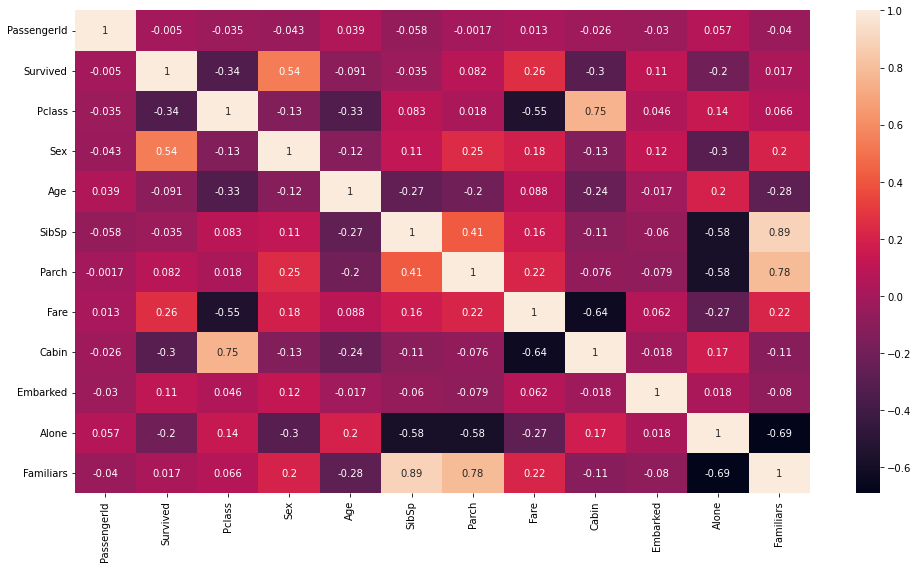

In [119]:
categories = {"female": 1, "male": 0}
df_train['Sex']= df_train['Sex'].map(categories)
df_test['Sex']= df_test['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked']= df_train['Embarked'].map(categories)
df_test['Embarked']= df_test['Embarked'].map(categories)

categories = df_train.Cabin.unique()
df_train['Cabin'] = df_train.Cabin.astype("category").cat.codes
df_test['Cabin'] = df_test.Cabin.astype("category").cat.codes

plt.figure(figsize=(14,8))
sns.heatmap(df_train.corr(), annot=True)
plt.tight_layout()

Eliminons les fonctionnalités sans importance comme le nom et le numéro de ticket.

In [120]:
# dropping columns
df_train = df_train.drop(['Name','Ticket','PassengerId'], axis=1)
df_test = df_test.drop(['Name','Ticket','PassengerId'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,0,3,0,22.0,1,0,7.2500,8,1,0,2
1,1,1,1,38.0,1,0,71.2833,2,2,0,2
2,1,3,1,26.0,0,0,7.9250,8,1,1,1
3,1,1,1,35.0,1,0,53.1000,2,1,0,2
4,0,3,0,35.0,0,0,8.0500,8,1,1,1


# Normalize the data

De nombreux algorithmes d'apprentissage automatique tels que les types de régression et ceux basés sur la distance peuvent converger plus rapidement lorsque les données sont normalisées,

il s'agit d'une étape clé dans chaque situation d'apprentissage automatique. 

Transformez les fonctionnalités en adaptant chaque fonctionnalité à une plage donnée.

Cet estimateur met à l'échelle et traduit chaque caractéristique individuellement de sorte qu'elle se trouve dans la plage donnée sur l'ensemble d'apprentissage, par exemple entre zéro et un.

Pour ce faire, j'utiliserai MinMaxScalerla bibliothèque de Scikit Learn, mais nous devons d'abord supprimer la cible ("Survived"). 

Lors de la mise à l'échelle, nous adaptons uniquement le scaler à l'ensemble de données d'entraînement.

In [121]:
from sklearn.preprocessing import MinMaxScaler

# Dropping label
LABEL = 'Survived'
y = df_train[LABEL]
df_train = df_train.drop(LABEL, axis=1)  # Dropping label to normalize

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train)
scaled_test = scaler.transform(df_test)

scaled_train = pd.DataFrame(scaled_train, columns=df_train.columns, index=df_train.index)
scaled_test = pd.DataFrame(scaled_test, columns=df_test.columns, index=df_test.index)

scaled_train.head()
#print(scaled_test)


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars
0,1.0,0.0,0.271174,0.125,0.0,0.014151,1.00,0.0,0.0,0.1
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.25,0.5,0.0,0.1
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.00,0.0,1.0,0.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.25,0.0,0.0,0.1
4,1.0,0.0,0.434531,0.000,0.0,0.015713,1.00,0.0,1.0,0.0


# Classification et Apprentissage

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train, y_train)

(712, 10) (179, 10)
(712,) (179,)


RandomForestClassifier()

# Test

In [123]:
#On applique le modèle que l'on vient 
#d'entraîner sur l'échantillon de test
predictions = clf.predict(x_test)


# Confusion Matrix

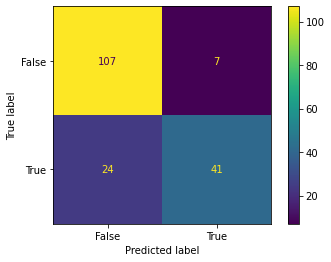

In [124]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

#Cross Validation


In [125]:
cv_test = cross_val_score(clf, x_test, y_test, cv=5).mean().round(5)
model_score = clf.score(x_test, y_test).round(5)    

# Accuracy
Précision
La précision mesure la fréquence à laquelle le modèle est correct.

Comment calculer
(Vrai positif + Vrai négatif) / Prédictions totales

In [126]:
Accuracy = metrics.accuracy_score(y_test, predictions)
print(Accuracy)

0.8268156424581006


# Précision
Parmi les positifs prédits, quel pourcentage est vraiment positif ?

Comment calculer: 

Vrai positif / (vrai positif + faux positif)

La précision n'évalue pas les cas négatifs correctement prédits :

In [127]:
Precision = metrics.precision_score(y_test, predictions)
print(Precision)

0.8541666666666666


# Sensibilité 
Parmi tous les cas positifs, quel pourcentage sont prédits positifs ?

La sensibilité (parfois appelée rappel) mesure la capacité du modèle à prédire les positifs.

Cela signifie qu'il examine les vrais positifs et les faux négatifs (qui sont des positifs qui ont été incorrectement prédits comme négatifs).

In [128]:
Sensitivity_recall = metrics.recall_score(y_test, predictions)
print(Sensitivity_recall)

0.6307692307692307


# Spécificité

Dans quelle mesure le modèle prédit-il des résultats négatifs ?

La spécificité est similaire à la sensibilité, mais la considère du point de vue des résultats négatifs.

Comment calculer
Vrai négatif / (vrai négatif + faux positif)

Comme c'est juste l'opposé de Recall, nous utilisons la fonction rappel_score, en prenant l'étiquette de position opposée :

In [129]:
Specificity = metrics.recall_score(y_test, predictions, pos_label=0)
print(Specificity)

0.9385964912280702


# Note F
Le score F est la "moyenne harmonique" de la précision et de la sensibilité.

Il prend en compte à la fois les cas de faux positifs et de faux négatifs et convient aux ensembles de données déséquilibrés.

Comment calculer
2 * ((Précision * Sensibilité) / (Précision + Sensibilité))

Ce score ne prend pas en compte les valeurs True Negative :

In [130]:
F1_score = metrics.f1_score(y_test, predictions)
print(F1_score)

0.7256637168141593


In [131]:
data={'Model':'RandomForest','Cross_Validation':cv_test,'Accuracy':model_score,'Précision': Precision,'Sensibilité':Sensitivity_recall,'Specificité':Specificity,'Note F': F1_score}
df=pd.DataFrame(data=data,index=[1])
df

,Model,Cross_Validation,Accuracy,Précision,Sensibilité,Specificité,Note F
1,RandomForest,0.7481,0.82682,0.854167,0.630769,0.938596,0.725664


# Passer en revue les features importantes pour la classification.

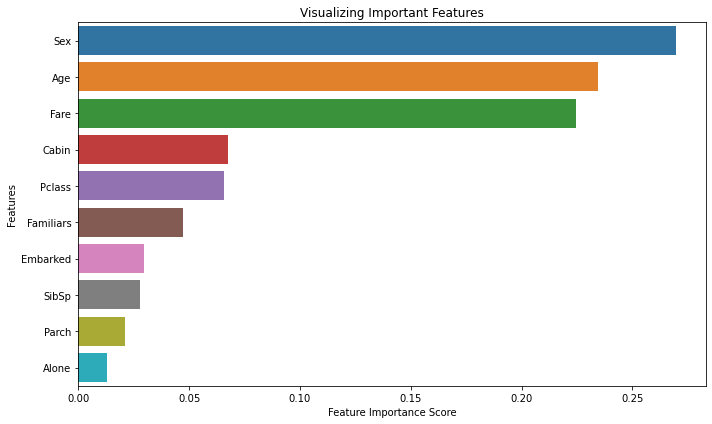

In [132]:
feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

Nous pouvons supprimer les fonctionnalités les moins importantes pour l'algorithme 

et voir si la précision s'améliore. Avec toutes les fonctionnalités, 

la précision était de 82 %. Voyons comment supprimer les moins importants comme 'Alone', 'Parch' et 'Embarked'.

(712, 7) (179, 7)
(712,) (179,)
   Accuracy: 0.8435754189944135


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Familiars,Survival_Predictions
0,3,0,34.5,0,0,7.8292,7,3,1,1,0
1,3,1,47.0,1,0,7.0000,7,1,0,2,0
2,2,0,62.0,0,0,9.6875,7,3,1,1,0
3,3,0,27.0,0,0,8.6625,7,1,1,1,1
4,3,1,22.0,1,1,12.2875,7,1,0,3,0


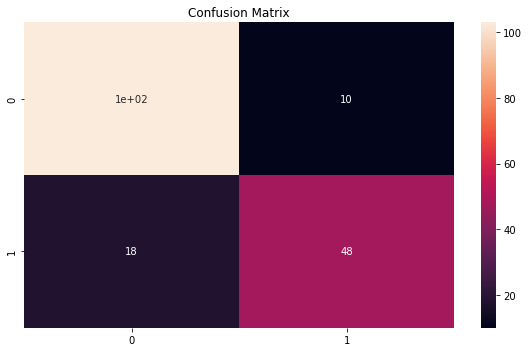

In [133]:
# Removing less important features
new_train = scaled_train.drop(['Alone','Parch','Embarked'], axis=1)
new_test = scaled_test.drop(['Alone','Parch','Embarked'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

#print(classification_report(y_test,y_pred))
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

prediction = clf.predict(new_test)

df_test['Survival_Predictions'] = pd.Series(prediction)
df_test.head()